## Fetching Real Time Data from Twitter using Twitter API 

In [67]:
from textblob import TextBlob
import tweepy
import matplotlib.pyplot

# Info

API Key : eGEuWMgUiTjPaHl5l2bou9AKd

API Secret Key : Zb7mu3bmc77e6dPjYkOABcRa4csaFfPkrNXZUjyyqTsAAJdyhr

Bearer Token : AAAAAAAAAAAAAAAAAAAAAPn1QAEAAAAAgjaFn776STDbJC4t1fw9U7raSAA%3DLuywUHYQC3mhA5hKWXyYBkqExJJ15h9jxjsKSDq0PZWYQSp0LJ

Access Token : 1111665932919885825-KgjL1q9eDtdx4i2WhDU9r3lwdJ8AHp

Access Token Secret : 3OW4I6wxPmhqVHJDj60YO5jxXykLmyOgXXClQbJvnicUa

In [68]:
consumer_key = "eGEuWMgUiTjPaHl5l2bou9AKd"
consumer_secret = "Zb7mu3bmc77e6dPjYkOABcRa4csaFfPkrNXZUjyyqTsAAJdyhr"
access_token = "1111665932919885825-KgjL1q9eDtdx4i2WhDU9r3lwdJ8AHp"
access_token_secret = "3OW4I6wxPmhqVHJDj60YO5jxXykLmyOgXXClQbJvnicUa"

In [69]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

In [70]:
type(api)

tweepy.api.API

In [71]:
search_term = "Money Heist"
no_of_tweets = 1000

In [80]:
tweets = tweepy.Cursor(api.search, q = search_term).items(no_of_tweets)

In [76]:
for tweet in tweets:
    print(tweet.text)

RT @iamblackmyth2: Money Heist question thread...

Retweet 🔃 before you start off https://t.co/mrklokKWXQ
RT @iamblackmyth2: Money Heist question thread...

Retweet 🔃 before you start off https://t.co/mrklokKWXQ
RT @MabundaHiXiviri: If you like Money Heist and Who Killed Sara?
Please never recommend a show for me to watch..
@IMDb money heist!!
RT @iamblackmyth2: Money Heist question thread...

Retweet 🔃 before you start off https://t.co/mrklokKWXQ
since it's a heist— i had fun thinking what if “the professor” (from money heist/lacasa de papel) and his gang were… https://t.co/9dP3pkiazD
i remember first : a zombie-themed movie and a concept of heist in one show— familiar? who else watched “peninsula”… https://t.co/s05Oejs54k
RT @theseoulstory: [UPDATE] Lee Hyun Woo to join the casting line-up for the Korean remake of 'Money Heist'

Source: https://t.co/LBAgILQuW…
MONEY HEIST 🤡 https://t.co/it79oCEZxX
RT @theseoulstory: [UPDATE] Lee Hyun Woo to join the casting line-up for the Korean rem

In [77]:
positive = 0
negative = 0 
neutral = 0
polarity = 0 

In [81]:
for tweet in tweets:
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity
    if(analysis.sentiment.polarity ==0):
        neutral += 1
    if(analysis.sentiment.polarity < 0):
        negative +=1
    if(analysis.sentiment.polarity > 0):
        positive +=1

In [82]:
positive

111

In [83]:
negative

60

In [84]:
neutral

829

In [85]:
polarity

18.701564454064457

In [2]:
#defining a function to calculate percentage
def percent(part, whole):
    return 100*float(part)/float(whole)

In [91]:
positive = percent(positive,no_of_tweets)
negative = percent(negative,no_of_tweets)
neutral = percent(neutral, no_of_tweets)
polarity = percent(polarity, no_of_tweets)

In [92]:
positive = format(positive,'.2f')
negative = format(negative,'.2f')
neutral = format(neutral, '.2f')

In [93]:
positive

'11.10'

In [94]:
negative

'6.00'

In [95]:
neutral

'82.90'

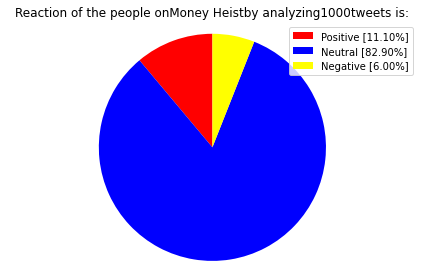

In [96]:
#Visualization of output
import matplotlib.pyplot as plt
labels = ['Positive ['+str(positive)+'%]','Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['red','blue','yellow']
patches, text = plt.pie(sizes,colors = colors,startangle = 90)
plt.legend(patches, labels, loc=  "best")
plt.title('Reaction of the people on'+search_term+'by analyzing'+str(no_of_tweets)+'tweets is:')
plt.axis('equal')
plt.tight_layout()
plt.show()